### Machine Learning Assignemnt 5 -- Question 9

In [2]:
%matplotlib inline

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn import tree

In [4]:
OJ_data = pd.read_csv("OJ.csv")

In [5]:
OJ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 150.5+ KB


In [7]:
OJ_data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [25]:
OJ_data["Purchase"] = OJ_data["Purchase"].astype("category")
OJ_data["purchase_id"] = OJ_data["Purchase"].cat.codes
OJ_data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,purchase_id
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,0
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0


In [35]:
OJ_data["Store7"] = pd.Series(np.where(OJ_data["Store7"]=="Yes",1,0))

In [36]:
X = OJ_data.drop(["Purchase","purchase_id"],axis=1)
y = OJ_data["purchase_id"]
X.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [38]:
from __future__ import division
n_size = 800/1070
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=n_size,random_state=40)

In [39]:
X_train.shape, X_test.shape

((800, 17), (270, 17))

In [138]:
dt = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [139]:
dt.feature_importances_

array([ 0.08568829,  0.01040155,  0.        ,  0.01346573,  0.0056838 ,
        0.00367793,  0.00585122,  0.00514208,  0.64786879,  0.01318136,
        0.00392969,  0.13815302,  0.00335599,  0.        ,  0.        ,
        0.04390503,  0.01969552])

In [140]:
print dt.decision_path

<bound method DecisionTreeClassifier.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>


### Evaluation on training dataset

In [ ]:
dt_train_preds = dt.predict_proba(X_train)[:, 1]
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_train, dt_train_preds)

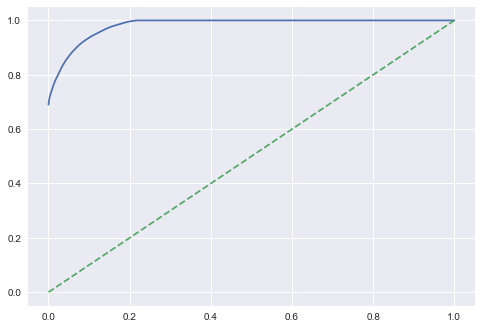

In [55]:
# draw the random baseline ROC line
fpr_rand = tpr_rand = np.linspace(0, 1, 10)

plt.plot(fpr_decision_tree, tpr_decision_tree)
plt.plot(fpr_rand, tpr_rand, linestyle='--')
plt.show()

In [58]:
roc_auc_score(y_train, dt_train_preds)

0.98234321058688145

In [121]:
dt_train_preds = dt.predict(X_train)

In [122]:
ctb = pd.crosstab(y_train, dt_train_preds, rownames =["TRUE"],colnames=['Predicted'])
ctb

Predicted,0,1
TRUE,,
0,456,28
1,37,279


In [123]:
# error rate
1-(456+279)/800

0.08125000000000004

### Evaluation on test dataset

In [41]:
dt_test_preds = dt.predict_proba(X_test)[:, 1]
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, dt_test_preds)

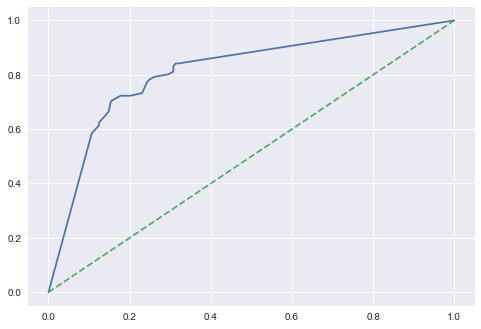

In [42]:
# draw the random baseline ROC line
fpr_rand = tpr_rand = np.linspace(0, 1, 10)

plt.plot(fpr_decision_tree, tpr_decision_tree)
plt.plot(fpr_rand, tpr_rand, linestyle='--')
plt.show()

In [47]:
roc_auc_score(y_test, dt_test_preds)

0.81369734606596744

In [44]:
dt_preds = dt.predict(X_test)

In [46]:
print classification_report(y_test,dt_preds)

             precision    recall  f1-score   support

          0       0.83      0.77      0.80       169
          1       0.65      0.73      0.69       101

avg / total       0.76      0.76      0.76       270



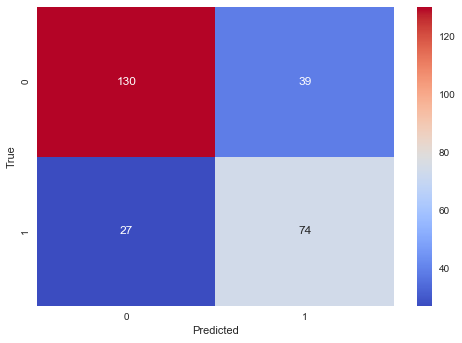

In [49]:
conf = pd.crosstab(index=y_test, columns=dt_preds, rownames=['True'], colnames=['Predicted'])
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

In [110]:
# Error rate
1-(130+74)/270

0.24444444444444446

### Tree Visualization

In [141]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
features

['WeekofPurchase',
 'StoreID',
 'PriceCH',
 'PriceMM',
 'DiscCH',
 'DiscMM',
 'SpecialCH',
 'SpecialMM',
 'LoyalCH',
 'SalePriceMM',
 'SalePriceCH',
 'PriceDiff',
 'Store7',
 'PctDiscMM',
 'PctDiscCH',
 'ListPriceDiff',
 'STORE']

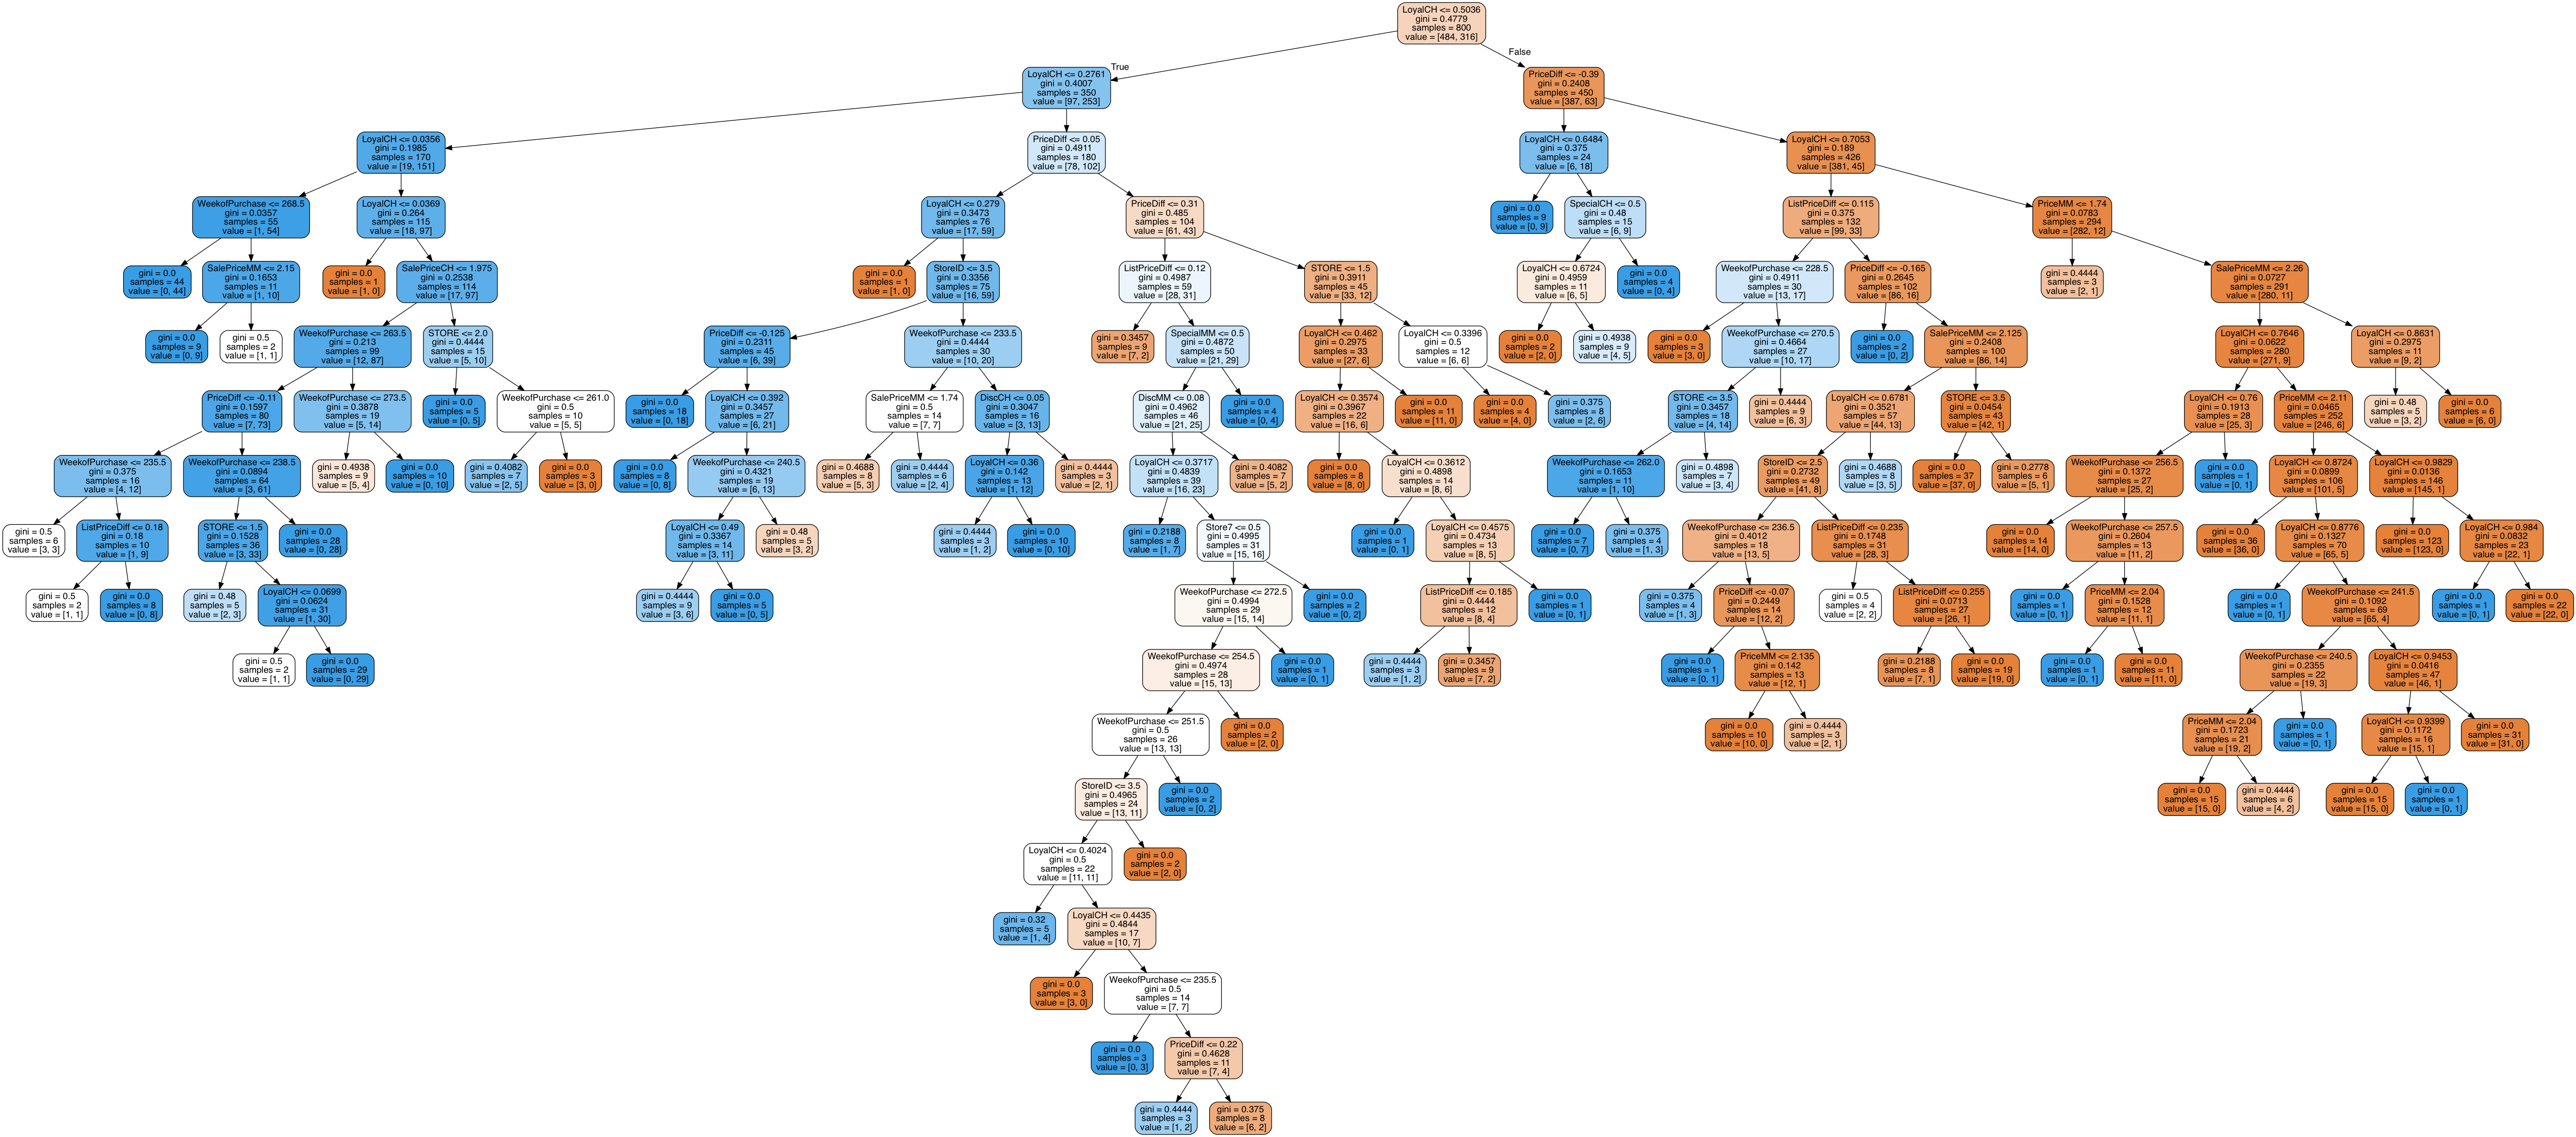

In [160]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [157]:
import pydotplus
import collections

# Visualize data
dot_data = tree.export_graphviz(dt,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')

True

#### 10 fold Cross validation

In [81]:
param_grid = {"max_depth": np.arange(1,20,)}
param_grid
cv = GridSearchCV(dt, param_grid, cv=10, n_jobs=4, refit=True, verbose=True)
cv.fit(X_train, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=4)]: Done 190 out of 190 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [82]:
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

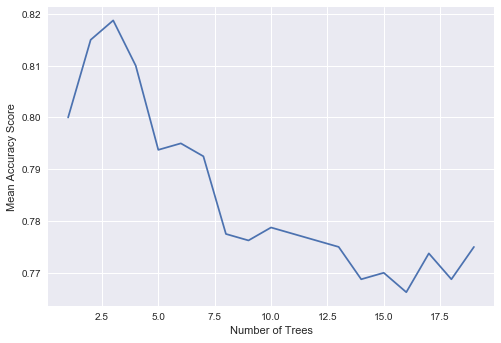

In [95]:
plt.plot(range(1,20,1),pd.DataFrame(cv.grid_scores_)["mean_validation_score"])
plt.xlabel("Number of Trees")
plt.ylabel("Mean Accuracy Score")

We may see that the 3-node tree is the smallest tree with the highest mean classification accuracy.

#### Evaluation on training dataset

In [111]:
cv_train_preds = cv.predict(X_train)
print classification_report(y_train,cv_train_preds)

             precision    recall  f1-score   support

          0       0.83      0.91      0.87       484
          1       0.84      0.72      0.78       316

avg / total       0.84      0.84      0.83       800



In [113]:
conf = pd.crosstab(index=y_train, columns=cv_train_preds, rownames=['True'], colnames=['Predicted'])
conf

Predicted,0,1
True,,
0,442,42
1,88,228


In [115]:
# error rate
1-(442+228)/800

0.16249999999999998

#### Evaluation on test dataset

In [100]:
cv_preds = cv.predict(X_test)

In [101]:
print classification_report(y_test,cv_preds)

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       169
          1       0.78      0.67      0.72       101

avg / total       0.81      0.81      0.80       270



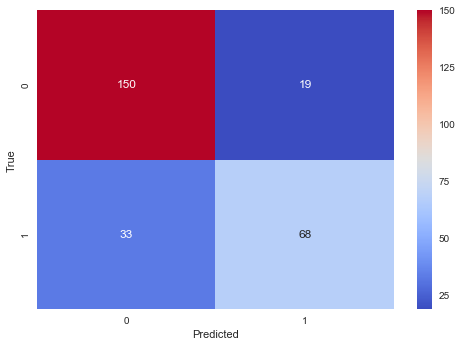

In [126]:
conf = pd.crosstab(index=y_test, columns=cv_preds, rownames=['True'], colnames=['Predicted'])
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

In [109]:
# Error rate
1- (150+68)/270

0.19259259259259254

#### Compare the training error rates between the pruned and unpruned trees. Which is higher?

- The misclassification error rate for training set for pruned tree is higher for the unpruned tree (0.1625 vs 0.0812).

#### Compare the test error rates between the pruned and unpruned trees. Which is higher?

- In this case, the pruning process slightly decreased the test error rate (0.1926 vs 0.2444).